In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas
import researchpy as rp
import scipy.stats as stats
import statsmodels.api as sm
import os
import yaml
from matplotlib import pyplot as plt
import numpy as np
from sklearn import preprocessing
import dataframe_image as dfi

In [3]:
def calcStuff(name, df):            
    subset = df[['inliers', 'sharpness', 'flow', 'contrast']]
    y = subset.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    y_scaled = min_max_scaler.fit_transform(y)
    subset_scaled = pandas.DataFrame(y_scaled, columns=subset.columns)
    makePlots(subset_scaled, name, plots_dir)
    calcCorrelation(subset_scaled,name, plots_dir)

In [4]:
def makePlots(subset_scaled, name, directory):
    plt = subset_scaled.plot(xlabel='frame number', title=name)
    fig = plt.get_figure()
    fig.savefig(directory+'/plots/'+name+'.png')
    

Correlation coeffs

In [6]:
def calcCorrelation(subset_scaled, name, directory):
    corr = subset_scaled.corr(method='pearson').style.background_gradient(cmap='coolwarm')
    corr.set_caption(name)
    dfi.export(corr, directory+'/corr_plots/'+name+'_corr.png')

[0803/164431.415339:WARNING:sandbox_linux.cc(376)] InitializeSandbox() called with multiple threads in process gpu-process.
[0803/164431.424796:WARNING:bluez_dbus_manager.cc(247)] Floss manager not present, cannot set Floss enable/disable.
[0803/164431.601959:INFO:headless_shell.cc(660)] Written to file /tmp/tmpaebcnfd3/temp.png.


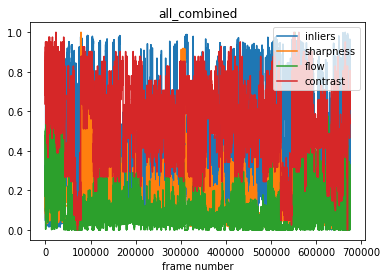

In [16]:
#directory = 'matching_interframe'
directory = 'matching_interframe'
plots_dir = os.getcwd()
extension = ('.csv')
filepaths = []
for subdir, dirs, files in os.walk(directory):
    for file in sorted(files):
        filepath = subdir + os.sep + file
        if filepath.endswith(extension):
            filepaths.append(filepath)
            #df = pandas.read_csv(filepath)
            #df.rename(columns = {'blur':'sharpness'}, inplace=True)
            #name = (filepath.split('/',1)[1]).split('_stats.csv')[0].replace('/', '_')
            #calcStuff(name, df)
df = pandas.concat([pandas.read_csv(f) for f in filepaths])
df.rename(columns = {'blur':'sharpness'}, inplace=True)
name = directory.split('/')[-1]
name='all_combined'
calcStuff(name, df)